# FIT5149 Assignment 2
<hr /> 

# Sentiment Classification - Product reviews
<hr /> 

## Group 30
### - Dhanashree Dinkar (29271932)
### - Girish Bhatta (29270863)
### - Sneha Jambagi (29329493)
<hr /> 

This notebook is used for text pre-processing (for training and test data), feautre generation, selection and model building.

### Importing Libraries

In [25]:
#Libraries for feature generation and modeling
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import  svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn import svm
from tqdm import tqdm
from sklearn import utils
import gensim
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np

#Libraries for text pre-processing
import nltk 
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import operator
from functools import reduce
import json
import statistics
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

## Reading data

In [3]:
#Reading train data
df_review = pd.read_csv('train_data.csv')
#Reading test data
df_review_test = pd.read_csv('test_data.csv')

In [4]:
df_review.head()

,trn_id,text
0,trn_1,Well this place got me to write my first revie...
1,trn_2,A very good Greek restaurant with tasty food. ...
2,trn_3,"Website says open, Google says open, Yelp says..."
3,trn_4,If I could give zero stars I would. When we wa...
4,trn_5,They have great food & definitely excellent se...


## Converting data to dictionary


The data is converted into a dictionary as it increases the speed of processing and improves the code readability.

In [5]:
#Train data
review_dict=df_review.set_index('trn_id').T.to_dict('list')

#Test data
review_dict_test=df_review_test.set_index('test_id').T.to_dict('list')

In [6]:
#Train data
for key,value in review_dict.items():
    review_dict[key]=value[0]
    
#Test data
for key,value in review_dict_test.items():
    review_dict_test[key]=value[0]

## Tokenization

The reviews have been tokenized using the below regex which removes punctuations and other special characters and but retains the words with apostrophes. We have considered apostrophes here as they contain some sentiment value like "can't", "don't", "won't".

#### Train data

In [7]:
tokenizer = RegexpTokenizer("\w+(?:[']\w+)?")   #Considers  apostrophes, removes special characters.

In [8]:
tokenized_dicts={}

for key,value in review_dict.items():
    #Case normalization
    lower_normal=value.lower()
    #Tokenization using the above regex
    tokenized_dicts[key]=tokenizer.tokenize(lower_normal)

In [9]:
tokenized_dicts_new = tokenized_dicts

#### Test data

In [ ]:
tokenized_dicts_test={}

for key,value in review_dict_test.items():
    #Case normalization
    lower_normal=value.lower()
    #Tokenization using the above regex
    tokenized_dicts_test[key]=tokenizer.tokenize(lower_normal)

In [ ]:
tokenized_dicts_new_test = tokenized_dicts_test

## Removing spaces 

#### Train data

In [10]:
#Regex to remove trailing spaces
tokenizer_space = RegexpTokenizer(r"\s+", gaps=True)

In [11]:
#Remove trailing spaces in the tokens
tokenized_dicts_space={}
for key,value in tokenized_dicts_new.items():
    list1=[]
    for each in value:
        tokenized_sp = tokenizer_space.tokenize(each)
        list1.append(tokenized_sp)
    if(len(list1) != 0):
        list1=reduce(operator.concat, list1)
    tokenized_dicts_space[key]=list1

#### Test data

In [ ]:
#Remove trailing spaces in the tokens
tokenized_dicts_space_test={}
for key,value in tokenized_dicts_new_test.items():
    list1=[]
    for each in value:
        tokenized_sp = tokenizer_space.tokenize(each)
        list1.append(tokenized_sp)
    if(len(list1) != 0):
        list1=reduce(operator.concat, list1)
    tokenized_dicts_space_test[key]=list1

##  Removing stop words


We tried removing the stopwords using different lists which were - 

- NLTK stop words (25 words in the list) - stopwords.words('english')
- NLTK stop words (576 words in the list) - stopwords_en.txt
- List containing only 'an', 'the', 'a'.
- Customized stop words list which included the following stop words - 

 stopwords_list_new=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',"it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'of', 'at', 'by', 'for', 'with',  'about', 'into', 'through', 'during', 'to', 'from', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all','any','both','each','few','more','most','other','some','such','only','own', 'same', 'so', 'too', 's', 't', 'can', 'will', 'just', 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',  'ma' ]
 
 
As it was observed that all the models perform better when no stop words are removed. Therefore, we decided not to remove the stopwords from the corpus. Hence the below code has been commmented. 

In [ ]:
# stopwords_list = stopwords.words('english')
# stopwords_list

#Remove stopwords
# tokenized_dicts_stop={}
# for key,value in tokenized_dicts_space.items():
#     list_stop=[]
#     for each in value:
#         if each not in stopwords_list:
#             list_stop.append(each)
#     tokenized_dicts_stop[key]=list_stop

## Remove words with alphanumeric characters


The below set of code was performed in the beginning but since it gave lower accuracy it was commented later on from the final preprocessing.

In [ ]:
#Remove non alphanumeric characters from the tokens
# tokenized_dicts_alpha={}

# for key,value in tokenized_dicts_stop.items():
#     list_alpha=[]
#     for each in value:
#         if each.isalpha():
#             list_alpha.append(each)
#     tokenized_dicts_alpha[key]=list_alpha

## Stemming 


Stemming was used initially in the pre-processing steps. It was observed that lemmatization gave better results than stemming hence it was not used further.

In [ ]:
# stemmer = PorterStemmer()
# tokenized_dicts_stem={}
# for key,value in tokenized_dicts_alpha.items():
#     list_stem=[]
#     for each in value:
#         stem='{1}'.format(each, stemmer.stem(each)) 
#         list_stem.append(stem)
#     tokenized_dicts_stem[key]=list_stem

## Lemmatization 


Lemmatiztion has been chosen over stemming as it retains the meaning of the word. It produced better results on feature extraction, generation and modeling as well.

#### Train data

In [14]:
wordnet_lemmatizer = WordNetLemmatizer()

tokenized_dicts_lemma={}

for key,value in tokenized_dicts_space.items():
    list_lemma = []
    for each in value:
        lemma='{1}'.format(each,wordnet_lemmatizer.lemmatize(each)) 
        list_lemma.append(lemma)
    tokenized_dicts_lemma[key]=list_lemma

In [15]:
#This code was used for further modeling and feature generation by the team-mates.
json.dump(tokenized_dicts_lemma, open("lemma_notrem_stpwords_fin.txt",'w'))

#### Test data

In [ ]:
tokenized_dicts_lemma_test={}

for key,value in tokenized_dicts_space_test.items():
    list_lemma = []
    for each in value:
        lemma='{1}'.format(each,wordnet_lemmatizer.lemmatize(each)) 
        list_lemma.append(lemma)
    tokenized_dicts_lemma_test[key]=list_lemma

In [ ]:
#This code was used for further modeling and feature generation by the team-mates.
json.dump(tokenized_dicts_lemma_test, open("test_lemma_nostprem.txt",'w'))

## Reading the Pre-processed File

In [16]:
with open("lemma_notrem_stpwords_fin.txt") as file:
    json_data = json.loads(file.read())

## Data re-structuring and processing

In [17]:
# converting the dictionary to key value format and converting back to dataframe
for k in json_data:
    json_data[k] = " ".join(json_data[k])
        

tokenised_data =  pd.DataFrame(list(json_data.items()),columns=['id','review'])    
tokenised_data.head()
tokenised_data.dtypes

#reading the labels file

train_labels = pd.read_csv("train_label.csv")
train_labels.head()
train_labels.dtypes

#merging the lables with the training data
train_data = pd.merge(tokenised_data,train_labels,how = 'inner',left_on = 'id',right_on='trn_id')
train_data.head()
train_data.drop('trn_id',axis=1,inplace=True)
train_data.drop("id",axis=1,inplace=True)

In [18]:
train_data.head()

,review,label
0,well this place got me to write my first revie...,2
1,a very good greek restaurant with tasty food i...,5
2,website say open google say open yelp say open...,1
3,if i could give zero star i would when we walk...,1
4,they have great food definitely excellent serv...,5


## Exploratory Data Analysis

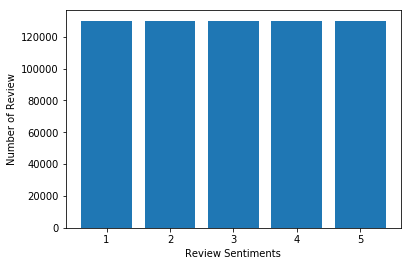

In [19]:
Sentiment_count=train_data.groupby('label').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['review'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

## Feature Generation and Extraction

### 1. Count Vectorization(Bag of Words)

In [20]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,2),tokenizer = token.tokenize)
text_counts= cv.fit_transform(train_data['review'])

### 2. Term frequency - Inverse Document Frequency(Tf-Idf)

In [21]:
tf = TfidfVectorizer(lowercase = True,analyzer = 'word',token_pattern=r'[a-zA-Z0-9]+'
                          ,ngram_range = (1,3))
text_tf= tf.fit_transform(train_data['review'])

### 3. Doc2Vec feature extraction

In [22]:
# function to label each sentences for each observation in the corpus
def label_sentences(corpus, label_type):
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled

In [23]:
# splitting the dataset into train and test and labelling each of the sentences by learning on the tagged documents using
# Tagged Documents
X_train, X_test, y_train, y_test = train_test_split(train_data.review, train_data.label, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test


In [28]:
# instantiating the Doc2Vec constructor specifying the vector-size and initial learning rate of 0.065
model_dbow = Doc2Vec(dm=0, vector_size=100, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)

# build a vocabulary for all the merged data
model_dbow.build_vocab([x for x in tqdm(all_data)])

# train the word vectors using the shuffle function of the tqdm package
for epoch in range(5):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha




100%|██████████| 650000/650000 [00:00<00:00, 3487241.62it/s]


In [29]:
# function to get the vectors from the trained model from when provided with the trained model instance, corpus size , the size of the 
# vector and vector type
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors



train_vectors_dbow = get_vectors(model_dbow, len(X_train), 100, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 100, 'Test')

## Setting up Cross Validation

In [30]:
def instantiate_cross_val(model):
    # perfroming 10 fold cross validation
    skf = StratifiedKFold(n_splits=10)
    params = {}
    nb = model
    gs = GridSearchCV(nb, cv=skf, param_grid=params, return_train_score=False)
    return gs

### splitting the train data for Count Vectoriser

In [31]:
# splitting the data for count vectoriser
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, train_data['label'], test_size=0.3, random_state=1)

In [32]:
# splitting the data for Tf-idf Vectoriser
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    text_tf, train_data['label'], test_size=0.3, random_state=1)

## 1. Fitting Models on Count Vectoriser

### 1.1 Multinomial Navie Bayes Classifier

In [33]:
model = MultinomialNB()
gs = instantiate_cross_val(model)

clf = gs.fit(X_train, y_train)
predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5443794871794871


### 1.2  Linear Support Vector Classifier (LinearSVC)

In [ ]:
model = LinearSVC()
gs = instantiate_cross_val(model)

model=gs.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Linear SVC Accuracy:",metrics.accuracy_score(y_test, y_pred))

### 1.3 Logistic Regression

In [ ]:
model = LogisticRegression()
gs = instantiate_cross_val(model)

clf=gs.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


## 2. Fitting Models of Tf-Idf Vectoriser

### 2.1 Multinomial Naive Bayes Classifier

In [ ]:
model = MultinomialNB()
gs = instantiate_cross_val(model)

clf = gs.fit(X_train1, y_train1)
predicted= clf.predict(X_test1)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test1, predicted))

### 2.2 Linear SVC 

In [ ]:
model = LinearSVC()
gs = instantiate_cross_val(model)

model=gs.fit(X_train1, y_train1)

y_pred = model.predict(X_test1)
print("Linear SVC Accuracy:",metrics.accuracy_score(y_test1, y_pred))

### 2.3 Logistic Regression

In [ ]:
model = LogisticRegression()
gs = instantiate_cross_val(model)

clf=gs.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)
print("Accuracy:", metrics.accuracy_score(y_test1, y_pred))


## 3. Fitting Models on Doc2Vec

### 3.1 Multinomial Naive Bayes

In [ ]:
# we will be making use of the vectors returned by the get_vectors function written above to train and build models. We will not be using k-fold cross validation.
clf = MultinomialNB()
clf.fit(train_vectors_dbow, y_train)

y_pred = clf.predict(test_vectors_dbow)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

### 3.2 Linear SVC

In [ ]:
# making use of the same function to train the documnet vectors on 
clf = LinearSVC()
clf.fit(train_vectors_dbow, y_train)

y_pred = clf.predict(test_vectors_dbow)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


### 3.3 Logistic Regression

In [ ]:
# using the same document vectors for logistic regression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)

y_pred = logreg.predict(test_vectors_dbow)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Below are the findings of the above operations on feature generations and feature extraction methods and of fitting several models on them. 
<li>The count vectorisation gave decent results on terms of accuracy. However tf-idf feature extraction for unigramsn and tri-grams produces the best results for Linear SVC and Logistic Regression.</li>
<li>The Doc2Vec perfroms the worst on the best algorithm of logistic regression and therefore, we do not proceed with fine tuning on models for Doc2Vec feature extraction methodology</li>
<li>Since Linear SVC and Logistic Regression provided the best results for tf-idf feature extraction, we perfromed fine tuning only on these models to achieve better results. The comprehensive statistics and metrics of the results of the fine tuning have been recorded in tabular form in the detailed report. In the following sections, we will be touching upon briefly what parameters were fine tuned and what values were found suitable.</li>

## Performance Optimisation and Parameter Fine Tuning

### * Tuning of  Penalty Parameter C for Linear SVC 

The parameter C which penalises a wrong classification thereby, optimising the plane that separates the observations belonging to a particular class and also to maintaing the large for minimum distance between the plane and the observed value. The parameter tuning started with assigning an arbitraty value and then increase and decrease the value of C until we reach the <b>local optima</b>. 
    
We started with values C = 1, 3 and 5. Observed that the accuracy kept decreasing as the value increased from 1 to 3 and to 5. therefore, the value between 1 and 3 were explored and it was finally concluded that the value <b>0.7</b> gives the best accuracy of 0.6523 for trigrams and TF-idf vectorisation on the test dataset. the values were increased and decreased by a factor 0.5 to obtain the approximate direction of increase/decrease. 

### * Tuning of Penalty and Solver Parameter for Logistic Regression for Tf-IDF vectorisation

A similar approach was employed as above in the hyperparameter tuning of Logistic Regression as well. We Started with L2 regularisation for Logistic regression with the default solver "Liblinear". Although it produced plausibe results, it was highly inefficient as it calcualted coeffients to the quadratic order and the cache management of this solver creates an operational overhead. We therefore, chose 2 solvers for optimisation. i.e "sag"(Stochastic average gradient) and "saga". These solvers are extremely efficient in terms of managing the memory and overhead operations as well. Also the LibLinear is best suited for problems with "One vs Rest" which basically suites a binary classification problem. In this case of multi-class classification problem, we choose multi-class = "multinomial" as the parameter. 


We started with similar values for C for both "sag" and "saga" solvers. We found that sag performs better compared to saga and we chose to go ahead with sag on this occasion. The following are the findings:

<li>The accuracy tends to change in a sinosuidal way. For values within a range it tends to change negatively and positively. With this observation in mind, we started with values 0.5,0.75,2,3,4,5,10. Although the accuracy changed in  wave form, we found that the range which gave the maximum value was between 2 to 3.</li>
<li>Upon further tuning we found that value C = 2.55 provides the best result of 0.65800 on "sag" solver and "multinomial" multiclass. the in-depth observations have been recorded in detail in the final report in a tabular form.</li>

## Models Producing Maximum Accuracy after Hyperparameter Tuning

### Linear SVC

In [ ]:
model = LinearSVC(C=0.7,penalty = 'l2',loss = 'squared-hinge')
model.fit(X_train1, y_train1)

y_pred = model.predict(X_test1)
print("Linear SVC Accuracy:",metrics.accuracy_score(y_test1, y_pred))


### Logistic Regression

In [ ]:
classifier = LogisticRegression(penalty = 'l2',C = 2.55,solver = 'sag',multi_class = 'multinomial')
classifier.fit(X_train1, y_train1)
y_pred = classifier.predict(X_test1)
print("Accuracy:", metrics.accuracy_score(y_test1, y_pred))


## Training and Predicting for the Entire Train and Test Dataset

### Reading the preprocessed Test File and Dataframe conversion

In [ ]:
with open("test_lemma_nostprem.txt") as file:
    json_data = json.loads(file.read())


for k in json_data:
    json_data[k] = " ".join(json_data[k])


tokenised_test_data =  pd.DataFrame(list(json_data.items()),columns=['id','review'])    
tokenised_test_data.head()

### TF-IDF vectorisation on the test and train dataset on the same dataset

In [ ]:
tf = TfidfVectorizer(lowercase = True,analyzer = 'word',token_pattern=r'[a-zA-Z0-9]+'
                          ,ngram_range = (1,3))

training_data = tf.fit_transform(train_data['review'])
testing_data = tf.transform(tokenised_test_data['review'])


### Training and Predictions on the best Model - Logistic Regression

In [ ]:
# building the model
classifier = LogisticRegression(C=2.55,solver='sag',multi_class = 'multinomial')

# Training on the entire dataset
classifier.fit(training_data,train_data['label'])

# predictions on the test data
y_pred = classifier.predict(testing_data)

# creating a dataframe for the predictions
acc = pd.DataFrame(y_pred)

# attaching the test_id for all the id's in test data
acc["test_id"] = tokenised_test_data["id"]

# rearraning of columns 
acc.columns = ["label","test_id"]

acc = acc[["test_id","label"]]

# writing to a file to check the accuracy in Kaggle
acc.to_csv("predict_label.csv",index=False)
